<a href="https://colab.research.google.com/github/kibisu14/ames/blob/master/machine_learning_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import the necessary libraries
import pandas as pd # for data processing, Csv file
import numpy as np # linear algebra
import sklearn # for machine learning analysis
import seaborn as sns #for plotting and EDA
import matplotlib.pyplot as plt #for plotting




/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#loading the dataset into the environment
wine_quality = pd.read_csv("datasets_4458_8204_winequality-red.csv")

In [ ]:
#having a glimpse at our dataset before our EDA begins
wine_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#looking at the composition of our dataset
wine_quality.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
# also i will look at the information regarding our data
wine_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


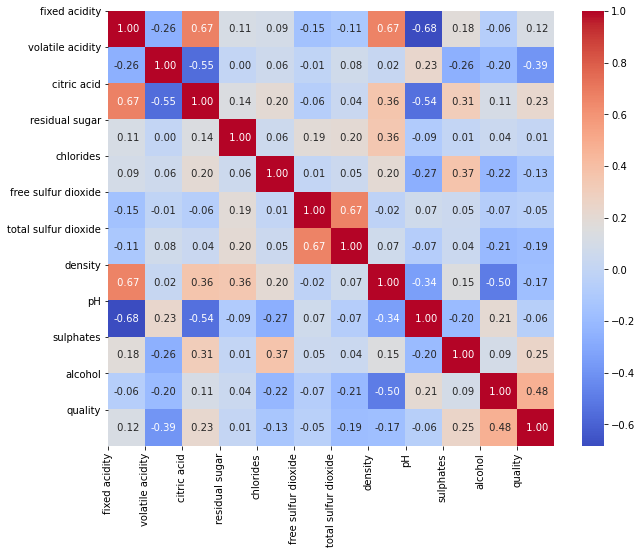

In [6]:
#doing our corelation analysis
corr = wine_quality.corr()
#plot figsize
fig, ax = plt.subplots(figsize =(10,8))
#Generate heatmap, allow annotations, and place floats in map
sns.heatmap(corr, cmap = 'coolwarm', annot=True, fmt = " .2f")
#apply xticks
plt.xticks(range(len(corr.columns)),corr.columns);
#apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

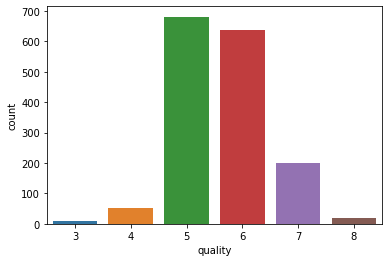

In [7]:
# count of the target variable through the countplot/bargraph
sns.countplot(x = 'quality',data = wine_quality)

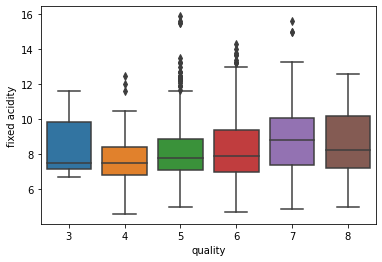

In [8]:
#plotting a boxplot between the target variable and the other variables
sns.boxplot('quality','fixed acidity', data = wine_quality)

as we can see we had lots of outliers


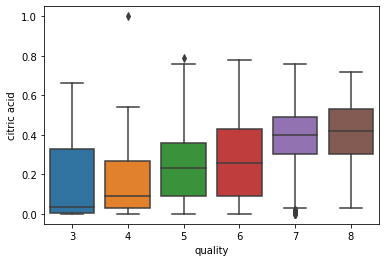

In [10]:
# target variable against the citric acid
sns.boxplot('quality', 'citric acid', data = wine_quality)

less outliers in this comparison


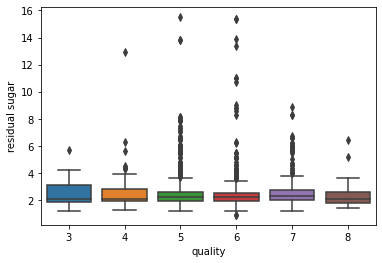

In [11]:
# target variable against residual sugar
sns.boxplot('quality', 'residual sugar', data=wine_quality)


from the few visulizations we see that some columns had lots of outliers with the target variable


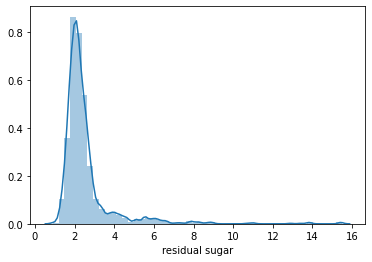

In [13]:
#we can do some visualizations of the numerics using the histogram
sns.distplot(wine_quality['residual sugar'])

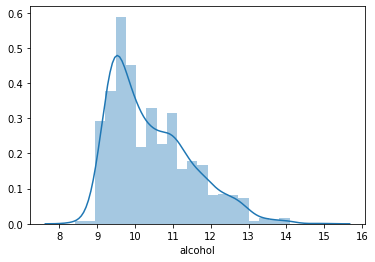

In [14]:
sns.distplot(wine_quality['alcohol'])

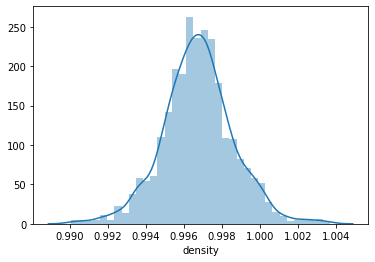

In [15]:
sns.distplot(wine_quality['density'])

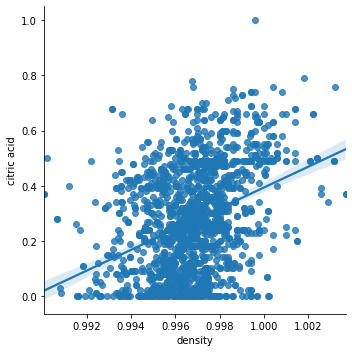

In [16]:
#looking at the linear relationships in the dataset using the lmplot
sns.lmplot('density', 'citric acid', data = wine_quality)


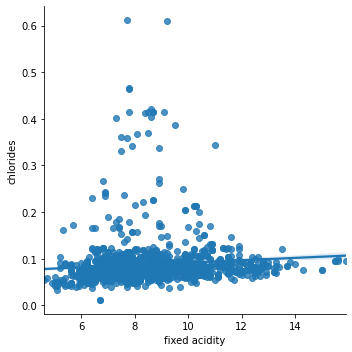

In [17]:
#relationship between the fixed acidity and chlorides
sns.lmplot('fixed acidity', 'chlorides', data = wine_quality)

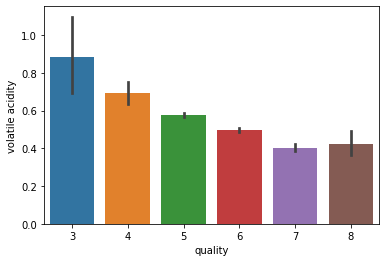

In [18]:
#we can also look at how different variables were in number in relation to the target variable
#we will use the seaborn's barplot
sns.barplot('quality', 'volatile acidity', data = wine_quality)

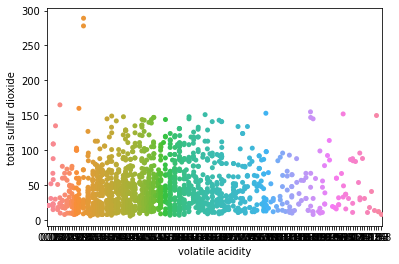

In [20]:
# now we can look at how the different variables related to one another using the scatter plot
sns.stripplot('volatile acidity', 'total sulfur dioxide', data = wine_quality)

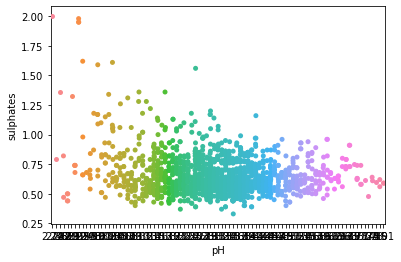

In [21]:
sns.stripplot('pH', 'sulphates', data = wine_quality)

In [22]:
# we can describe our dataset and see how the numeric variables are
wine_quality.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [24]:
#exploring our target variable
wine_quality['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [26]:
# After finishing our EDA now we can do our modeling and fit the algorithms
#importing the specific functions from the sklearn library
from sklearn.model_selection import  train_test_split
from sklearn.metrics import mean_squared_error,accuracy_score
from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge
from sklearn.preprocessing import PolynomialFeatures,StandardScaler,LabelEncoder
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.svm import SVC,SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

### starting with regression models

#### Linear regression


In [28]:

#separating the features and target then splitting it
x = wine_quality.drop('quality', axis = 1)
y = wine_quality['quality']
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


#### perform the train test split


In [30]:
xtrain, xtest,ytrain,ytest = train_test_split(x,y, test_size = 1/3, random_state = 0)

In [32]:
# lets scale our features so that they may fit well
from math import sqrt
sc = StandardScaler()
xtrain_scaled = sc.fit_transform(xtrain)
xtest_scaled = sc.fit_transform(xtest) 

In [33]:
# Fit our first model linear regression
mregres = LinearRegression()
mregres.fit(xtrain_scaled,ytrain)
ypred = mregres.predict(xtest_scaled)
# evaluate performance accuracy
RMSE = sqrt(mean_squared_error(ytest,y_pred=ypred))
RMSE

0.6424168291492945

#### polynomial regression

In [38]:
# polynomial regression model
poly_features = PolynomialFeatures(degree = 2)
xtrain_poly = poly_features.fit_transform(xtrain_scaled)
xtest_poly = poly_features.fit_transform(xtest_scaled)
model = LinearRegression()
model.fit(xtrain_poly, ytrain)
ypoly_pred = model.predict(xtest_poly)
rmse = sqrt(mean_squared_error(ytest,ypoly_pred))
rmse

0.6638226995742553

#### Decision tree regression

In [39]:
regressor = DecisionTreeRegressor()
regressor.fit(xtrain_scaled, ytrain)
dpred = regressor.predict(xtest_scaled)
sqrt(mean_squared_error(ytest,dpred))

0.8727692013351809

#### Support vector regression

In [41]:
svreg = SVR()
svreg.fit(xtrain_scaled, ytrain)
svpred = svreg.predict(xtest_scaled)
sqrt(mean_squared_error(ytest,svpred))

0.623721375820593

after fitting the rgression models we can see that the support vector regression performed well than the others

### Classification models

In [43]:
# first we will copy our dataset to anew one
wine_classifier = wine_quality.copy()

# convert the quality to a classification task
bins = (2,6.5,8)
labels = ['bad', 'good']
wine_classifier['quality'] = pd.cut(wine_classifier['quality'], bins = bins, labels = labels)

In [44]:
wine_classifier['quality'].value_counts()

bad     1382
good     217
Name: quality, dtype: int64

In [45]:
# now we can encode our labels since the algorithms can't accept strings
le = LabelEncoder()
wine_classifier['quality'] = le.fit_transform(wine_classifier['quality'])

In [47]:
xc = wine_classifier.drop('quality',axis = 1)
yc = wine_classifier['quality']

In [49]:
#now we can split the data
x_train, x_test, y_train, y_test = train_test_split(xc,yc, test_size = 1/3, random_state = 1)
# scale the data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

#### Naive bayes

In [50]:
cl_nb = GaussianNB()
cl_nb.fit(x_train,y_train)
clpred = cl_nb.predict(x_test)
accuracy_score(y_test,clpred)

0.8217636022514071

#### Logistic Regression

In [51]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
lrpred = lr.predict(x_test)
accuracy_score(y_test,lrpred)

0.8592870544090057

#### Decision tree classifier

In [52]:
dc = DecisionTreeClassifier()
dc.fit(x_train,y_train)
dcpred = dc.predict(x_test)
accuracy_score(y_test, dcpred)

0.8686679174484052

#### KNN Model

In [54]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
kpred = knn.predict(x_test)
accuracy_score(y_test, kpred)

0.8705440900562852

#### Support vector machine algorithm

In [56]:
svm = SVC()
svm.fit(x_train, y_train)
svmpred = svm.predict(x_test)
accuracy_score(y_test,svmpred)

0.8836772983114447

#### Random Forest Classifier

In [57]:
rand = RandomForestClassifier()
rand.fit(x_train, y_train)
rand_pred = rand.predict(x_test)
accuracy_score(y_test, rand_pred)

0.8949343339587242

#### XG Boost classifier

In [59]:
xg = XGBClassifier()
xg.fit(x_train,y_train)
xg_pred = xg.predict(x_test)
accuracy_score(y_test, xg_pred)

0.8818011257035647

From all the classification algorithms it can be seen that the random forest classifier did a great job in the prediction